In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
#the sample size for interacting and displaying
set_size=50

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA ANALYSIS

In [4]:
data=pd.read_csv('/content/drive/MyDrive/ML projekts/data2/results.csv',delimiter='|')

In [5]:
data

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ..."


In [6]:
#renaming to convenience
data=data.rename(columns={' comment':'comment',' comment_number':'comment_number'})

In [7]:
data=pd.DataFrame(data)

In [8]:
data.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [9]:
#null checking
data.isnull().sum()

image_name        0
comment_number    0
comment           0
dtype: int64

In [10]:
data['comment'].fillna("",inplace=True)

In [11]:
#contains about 1600 images out of the entire dataset
path='/content/drive/MyDrive/ML projekts/data2/'
img_list=os.listdir(path)[:set_size]

In [12]:
img_list[0]

'23012579.jpg'

In [13]:
#RANDOM SAMPLING
'''
num=random.randint(0,4)
data_new=data[
'''

'\nnum=random.randint(0,4)\ndata_new=data[\n'

In [22]:

data_new=data

In [23]:
#type casting for json file to feed in load_dataset
image_comments = []
for i in range(len(data_new)):
    d={}
    d['file_name']=data_new['image_name'][i]
    d['comment']=data_new['comment'][i]
    image_comments.append(d)


In [24]:
#creating json file
'''
import json


# add metadata.jsonl file to this folder
with open("metadata.jsonl", 'w') as f:
    for item in captions:
        f.write(json.dumps(item) + "\n")
'''

'\nimport json\n\n\n# add metadata.jsonl file to this folder\nwith open("metadata.jsonl", \'w\') as f:\n    for item in captions:\n        f.write(json.dumps(item) + "\n")\n'

In [25]:
len(data_new)

158915

In [26]:
len(image_comments)

158915

In [27]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [28]:
#loading the metadata into dataset
path_2='/content/drive/MyDrive/ML projekts/data2'
from datasets import load_dataset

dataset_main = load_dataset("imagefolder", data_dir=path_2,split="train")


Resolving data files:   0%|          | 0/1602 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [29]:
dataset_main

Dataset({
    features: ['image', 'comment'],
    num_rows: 1600
})

TRAIN_TEST_SPLIT

In [30]:
#splitting dataset as train and test
dataset_main=dataset_main.train_test_split(test_size=0.2,shuffle=True)

In [31]:
dataset_main

DatasetDict({
    train: Dataset({
        features: ['image', 'comment'],
        num_rows: 1280
    })
    test: Dataset({
        features: ['image', 'comment'],
        num_rows: 320
    })
})

In [32]:
train=dataset_main['train']
test=dataset_main['test']

In [33]:
'''
train.reset_index(inplace=True)
print(train.columns)
'''

'\ntrain.reset_index(inplace=True)\nprint(train.columns)\n'

In [34]:
#train.drop(columns=['index','comment_number'])

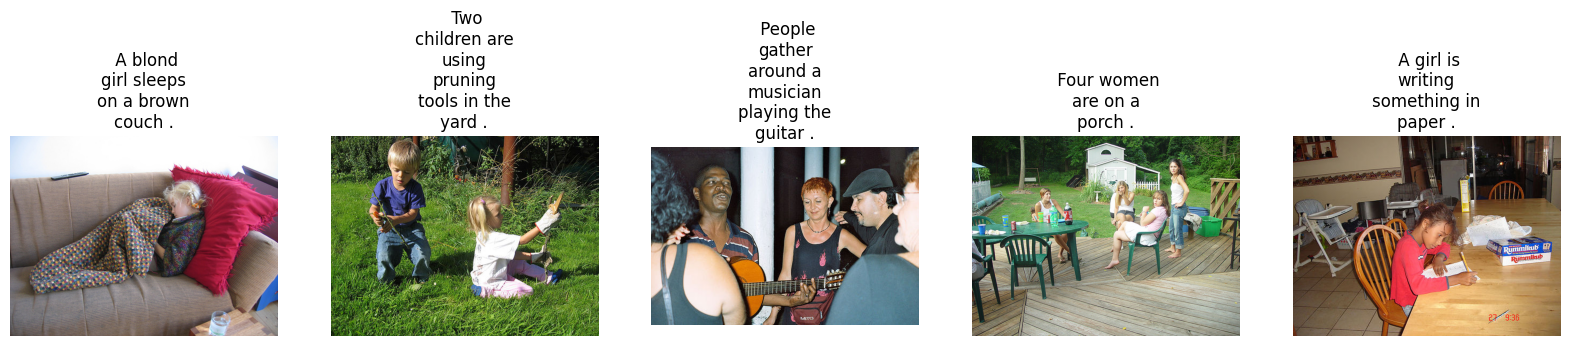

In [35]:
#displaying 5 images from the sample along with the respective captions
from textwrap import wrap



def sample_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")


img_sample = [np.array(train['image'][i]) for i in range(5)]
cap_sample = [train['comment'][i] for i in range(5)]
sample_images(img_sample,cap_sample)


HUGGING FACE MODEL IMPLEMENTATION

In [36]:
#creating processor for model
from transformers import AutoProcessor

list = ["microsoft/git-base","Salesforce/blip-image-captioning-large","Salesforce/blip-image-captioning-base","nlpconnect/vit-gpt2-image-captioning"]
model_val=list[0]
processor = AutoProcessor.from_pretrained(model_val)

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [37]:
'''
def transforms(example_batch):
    images = [x for x in example_batch["image"]]
    captions = [x for x in example_batch["comment"]]
    inputs = processor(images=images, text=captions, padding="max_length")
    inputs.update({"labels": inputs["input_ids"]})
    return inputs

#train.set_transform(transforms)
#test.set_transform(transforms)
'''

'\ndef transforms(example_batch):\n    images = [x for x in example_batch["image"]]\n    captions = [x for x in example_batch["comment"]]\n    inputs = processor(images=images, text=captions, padding="max_length")\n    inputs.update({"labels": inputs["input_ids"]})\n    return inputs\n\n#train.set_transform(transforms)\n#test.set_transform(transforms)\n'

In [38]:
#!pip install evaluate

In [39]:

from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["comment"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding

In [40]:
#creating object to class
train_dataset = ImageCaptioningDataset(train, processor)

In [41]:
#DISPLAYING SOME DATA
item = train_dataset[0]
for k,v in item.items():
  print(k,v.shape)

input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [42]:

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [43]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [44]:

processor.decode(batch["input_ids"][0])

'[CLS] police on horseback at an outside protest. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

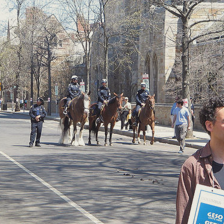

In [45]:
#displaying the relevant image
from PIL import Image
import numpy as np

mean = np.array([123.675, 116.280, 103.530]) / 255
std = np.array([58.395, 57.120, 57.375]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(std)[:, None, None]) + np.array(mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)


RUNNING THE MODEL

In [46]:
#loading model
from transformers import AutoModelForCausalLM
from transformers import BlipProcessor, BlipForConditionalGeneration


model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")
#model=AutoModelForCasualLM.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
#model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [47]:
#setting output parameters
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss    #loss value to be monitored

tensor(12.0687, grad_fn=<NllLossBackward0>)

In [48]:

import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)   #adam optimizer with v low LR

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()    #training

for epoch in range(5):   #5 epochs
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    if loss.item()<0.07:
      break

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch: 0
Loss: 12.380655288696289
Loss: 10.7510986328125
Loss: 10.037253379821777
Loss: 9.731169700622559
Loss: 9.602514266967773
Loss: 9.328695297241211
Loss: 9.174174308776855
Loss: 8.97994613647461
Loss: 8.832038879394531
Loss: 8.684122085571289
Loss: 8.53565788269043
Loss: 8.422893524169922
Loss: 8.311257362365723
Loss: 8.258795738220215
Loss: 8.129020690917969
Loss: 8.022887229919434
Loss: 7.896068096160889
Loss: 7.815023422241211
Loss: 7.6779961585998535
Loss: 7.568032741546631
Loss: 7.4846391677856445
Loss: 7.381105899810791
Loss: 7.306966781616211
Loss: 7.235437870025635
Loss: 7.105898380279541
Loss: 6.9960150718688965
Loss: 6.942727088928223
Loss: 6.79934024810791
Loss: 6.707215309143066
Loss: 6.611429214477539
Loss: 6.518011569976807
Loss: 6.37585973739624
Loss: 6.295913219451904
Loss: 6.170509338378906
Loss: 6.077795028686523
Loss: 5.966874599456787
Loss: 5.85239315032959
Loss: 5.760367393493652
Loss: 5.683328628540039
Loss: 5.537378311157227
Loss: 5.447335243225098
Loss: 5.

TESTING ON CUSTOM IMAGE

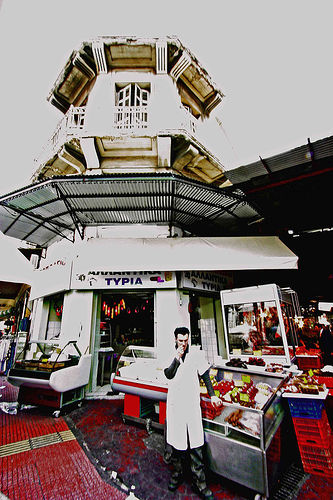

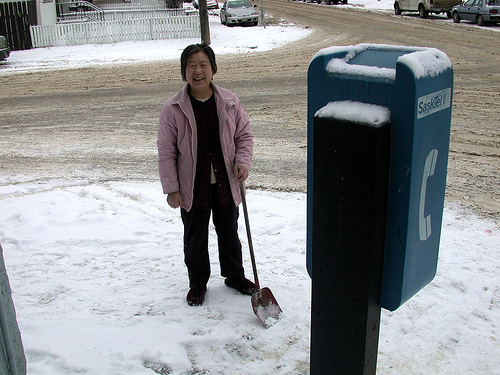

a man is holding a camera.


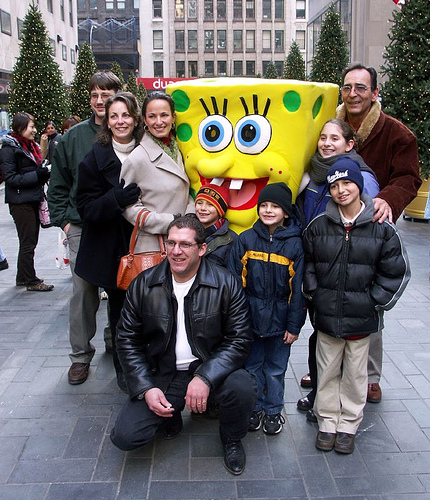

a man is holding a baby.


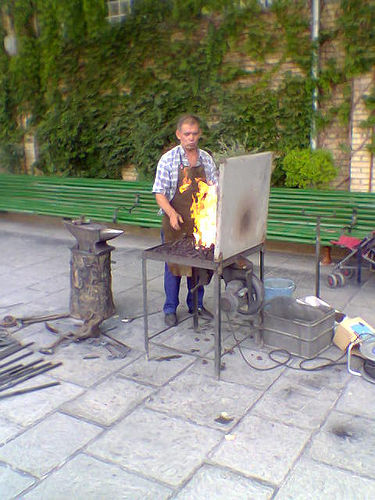

a man is holding a baby in a blue shirt.


In [56]:
for i in range(3):
  j=random.randint(1,100)
  image=test[j]['image']
  #width, height = image.size
  #display(image.resize((int(0.3*width), int(0.3*height))))
  display(image)
  inputs = processor(images=image, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values
  #print(pixel_values)
  generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  print(generated_caption)

In [ ]:
#At this point it is generating some bad outputs which can be due to lesser training data and also lesser epochs or due to overfitting

In [51]:
'''
HAVE NOT INCLUDED METRICS AS THEY ARE VERY COMPLICATED FOR IMAGE CAPTIONING PROBLEMS
'''

'\nHAVE NOT INCLUDED METRICS AS THEY ARE VERY COMPLICATED FOR IMAGE CAPTIONING PROBLEMS\n'